# Calm (US) App Store

## Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, ENGLISH_STOP_WORDS
import math
import seaborn as sns
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from langdetect import detect_langs

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/delaltomruk/meditation-proj/main/data/appstore_calm_us.csv?token=APZEDM5RNVEK5Q6RVCNU3MDALBV3O")

In [4]:
df.head()

,Unnamed: 0,date,rating,review
0,0,2020-12-06 05:17:39,5,I updated the calm app and just out of curiosi...
1,1,2020-09-21 22:38:20,3,I really don’t like how you have to pay to get...
2,2,2020-12-08 16:02:24,3,I just wanted to leave a recommendation. Ther...
3,3,2020-04-11 13:11:09,5,I absolutely love love love this app!!!!♥️ onc...
4,4,2020-05-24 19:52:55,4,"Honestly, I had come to a point in my life whe..."


# Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   date        1000 non-null   object
 2   rating      1000 non-null   int64 
 3   review      1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Unnamed: 0,rating
count,1000.000000,1000.000000
mean,499.500000,4.222000
std,288.819436,1.257098
min,0.000000,1.000000
25%,249.750000,4.000000
50%,499.500000,5.000000
75%,749.250000,5.000000
max,999.000000,5.000000


In [7]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df = df.drop(columns=["date"])
df.head()

,rating,review,year,month,day
0,5,I updated the calm app and just out of curiosi...,2020,12,6
1,3,I really don’t like how you have to pay to get...,2020,9,21
2,3,I just wanted to leave a recommendation. Ther...,2020,12,8
3,5,I absolutely love love love this app!!!!♥️ onc...,2020,4,11
4,4,"Honestly, I had come to a point in my life whe...",2020,5,24


In [9]:
from nltk import word_tokenize
word_token = [word_tokenize(review) for review in df.review]
len_tokens= [] 

for i in range(len(word_token)):
    len_tokens.append(len(word_token[i]))

df["n_tokens"] = len_tokens
df.head()

,rating,review,year,month,day,n_tokens
0,5,I updated the calm app and just out of curiosi...,2020,12,6,300
1,3,I really don’t like how you have to pay to get...,2020,9,21,332
2,3,I just wanted to leave a recommendation. Ther...,2020,12,8,314
3,5,I absolutely love love love this app!!!!♥️ onc...,2020,4,11,288
4,4,"Honestly, I had come to a point in my life whe...",2020,5,24,280


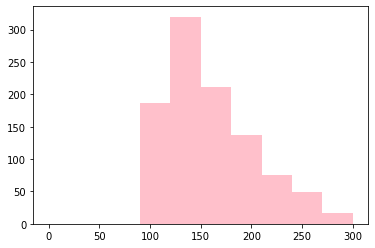

In [10]:
plt.hist(len_tokens, range=[0, 300], facecolor='pink');

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rating    1000 non-null   int64 
 1   review    1000 non-null   object
 2   year      1000 non-null   int64 
 3   month     1000 non-null   int64 
 4   day       1000 non-null   int64 
 5   n_tokens  1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [53]:
# Check if all reviews are in English
lang = [detect_langs(i) for i in df.review]
language = [str(i).split(":")[0][1:] for i in lang]
a = [lan for lan in language if lan != "en" ]

In [56]:
a # all reviews are in english

[]

In [57]:
df.groupby("rating").mean()

,year,month,day,n_tokens
rating,,,,
1,2019.029851,6.865672,17.641791,193.059701
2,2019.328358,6.656716,15.940299,181.880597
3,2019.480000,6.250000,16.290000,180.370000
4,2019.238532,6.394495,14.055046,158.311927
5,2018.995434,6.771689,15.745814,151.074581


In [58]:
df["year"].min()

2017

In [59]:
df["year"].max()

2021

In [60]:
correlation = df.corr()
correlation

,rating,year,month,day,n_tokens
rating,1.000000,-0.087758,0.014893,-0.040828,-0.308782
year,-0.087758,1.000000,-0.342896,-0.073099,0.099562
month,0.014893,-0.342896,1.000000,0.050745,0.000601
day,-0.040828,-0.073099,0.050745,1.000000,-0.015957
n_tokens,-0.308782,0.099562,0.000601,-0.015957,1.000000


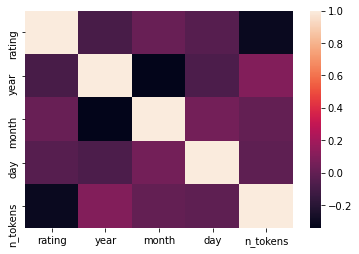

In [49]:
sns.heatmap(correlation)
plt.show()

# Data Visualization

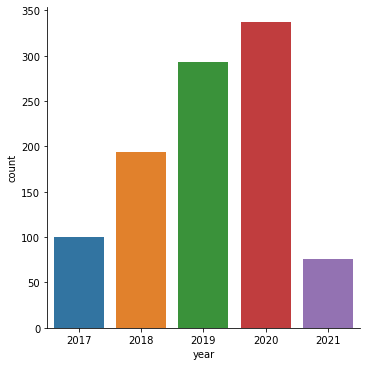

In [61]:
sns.catplot(x="year",data=df,kind="count")
plt.show()

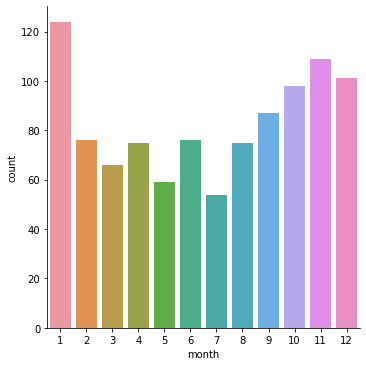

In [62]:
sns.catplot(x="month",data=df,kind="count")
plt.show()

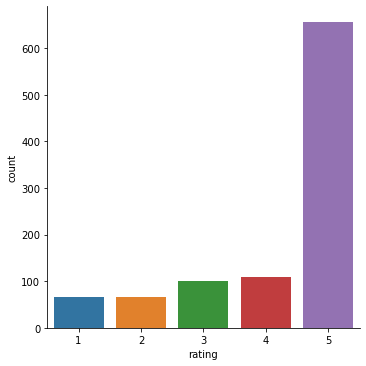

In [64]:
sns.catplot(x="rating",data=df,kind="count")
plt.show()

In [66]:
df.rating.value_counts()

5    657
4    109
3    100
2     67
1     67
Name: rating, dtype: int64

# Analysing Reviews

In [69]:
df['review'] = df['review'].str.replace('[^\w\s]','')
df['review'] = df['review'].str.lower()
df.head()

,rating,review,year,month,day,n_tokens
0,5,i updated the calm app and just out of curiosi...,2020,12,6,300
1,3,i really dont like how you have to pay to get ...,2020,9,21,332
2,3,i just wanted to leave a recommendation there...,2020,12,8,314
3,5,i absolutely love love love this app once i co...,2020,4,11,288
4,4,honestly i had come to a point in my life wher...,2020,5,24,280


In [70]:
df.isna().sum()

rating      0
review      0
year        0
month       0
day         0
n_tokens    0
dtype: int64

# Word Cloud

In [71]:
df_1 = df[(df["rating"] == 1)]
df_2 = df[(df["rating"] == 2)]
df_3 = df[(df["rating"] == 3)]
df_4 = df[(df["rating"] == 4)]
df_5 = df[(df["rating"] == 5)]

In [72]:
text_1 = " ".join(review for review in df_1.review)
text_2 = " ".join(review for review in df_2.review)
text_3 = " ".join(review for review in df_3.review)
text_4 = " ".join(review for review in df_4.review)
text_5 = " ".join(review for review in df_5.review)

In [86]:
stopwords = set(STOPWORDS)
stopwords.update(["meditation", "app", "meditate", "im", "meditations" ,"thing", "calm", "dont", "really"])

cloud_1 = WordCloud(stopwords=stopwords, background_color="white").generate(text_1)
cloud_2 = WordCloud(stopwords=stopwords, background_color="white").generate(text_2)
cloud_3 = WordCloud(stopwords=stopwords, background_color="white").generate(text_3)
cloud_4 = WordCloud(stopwords=stopwords, background_color="white").generate(text_4)
cloud_5 = WordCloud(stopwords=stopwords, background_color="white").generate(text_5)

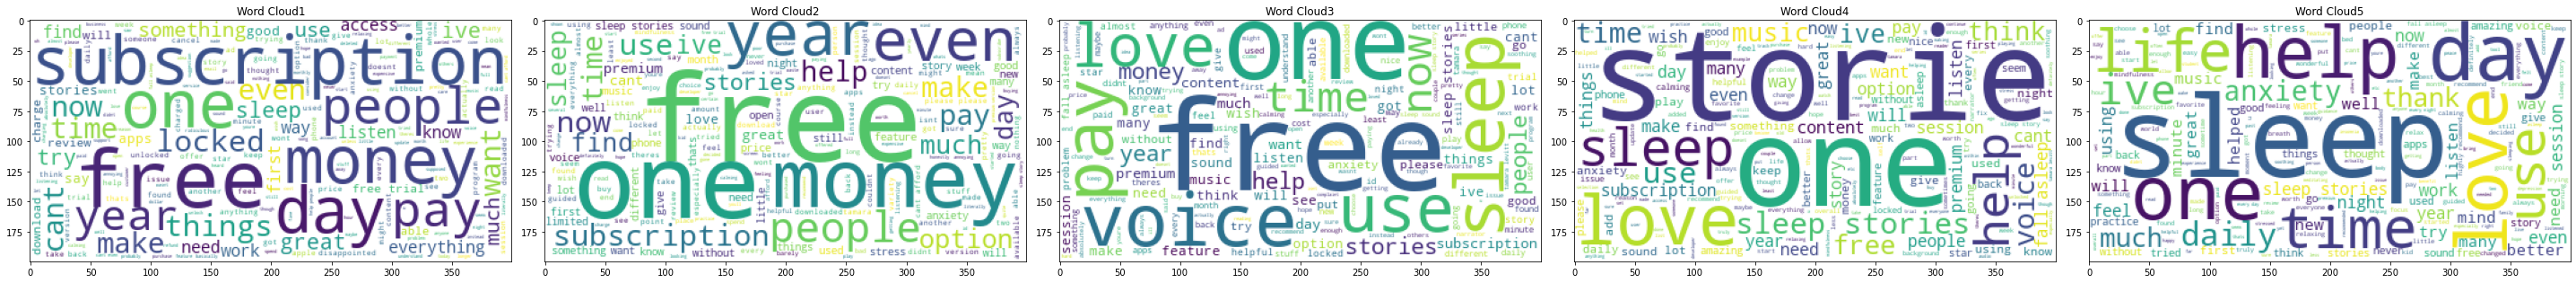

In [87]:
width=5
height=5
rows = 1
cols = 5
axes=[]
fig=plt.figure(figsize=(40, 40))

for a in range(rows*cols):
    cloud = [cloud_1, cloud_2, cloud_3, cloud_4, cloud_5]
    axes.append(fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Word Cloud"+str(a + 1))
    axes[-1].set_title(subplot_title)  
    plt.imshow(cloud[a])
fig.tight_layout()    
plt.show()

## Implementing TF-IDF

In [80]:
df.rating.value_counts()

5    657
4    109
3    100
2     67
1     67
Name: rating, dtype: int64

In [91]:
vect = TfidfVectorizer(max_features = 10,stop_words=stopwords)
tfIdf = vect.fit(df_1.review)
X = vect.transform(df_1.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,cant,even,free,locked,money,one,pay,people,subscription,things
0,0.000000,0.000000,0.092464,0.975042,0.108055,0.114317,0.000000,0.000000,0.000000,0.126487
1,0.197873,0.548794,0.000000,0.000000,0.352488,0.000000,0.000000,0.731726,0.000000,0.000000
2,0.000000,0.215403,0.177584,0.000000,0.415057,0.000000,0.415057,0.215403,0.728782,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.411132,0.820118,0.289213,0.273373,0.000000,0.000000,0.000000


In [92]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(df_2.review)
X = vect.transform(df_2.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,even,free,money,one,people,premium,sleep,stories,use,year
0,0.000000,0.557259,0.000000,0.547351,0.624395,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.398668,0.118601,0.651421,0.000000,0.531557,0.000000,0.116492,0.120779,0.135601,0.271202
3,0.487302,0.000000,0.477749,0.000000,0.730953,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.255462,0.000000,0.752757,0.286238,0.341417,0.250919,0.000000,0.146039,0.292079


In [93]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(df_3.review)
X = vect.transform(df_3.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,free,love,money,now,one,pay,sleep,stories,use,voice
0,0.160520,0.000000,0.949549,0.095845,0.000000,0.186102,0.145746,0.000000,0.086766,0.0
1,0.605445,0.000000,0.795887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.220799,0.000000,0.353624,0.000000,0.762536,0.335932,0.363163,0.0
3,0.644477,0.242038,0.000000,0.256542,0.678419,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.116869,0.128715,0.604822,0.777151,0.000000,0.0


In [94]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(df_4.review)
X = vect.transform(df_4.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,asleep,free,ive,love,music,one,sleep,stories,story,use
0,0.161005,0.000000,0.000000,0.000000,0.172575,0.284285,0.870802,0.265497,0.186260,0.000000
1,0.000000,0.000000,0.000000,0.673654,0.000000,0.224551,0.393045,0.209711,0.000000,0.545255
2,0.424552,0.000000,0.151687,0.000000,0.151687,0.000000,0.328029,0.466723,0.491145,0.455061
3,0.000000,0.000000,0.000000,0.000000,0.139098,0.114569,0.200536,0.962970,0.000000,0.000000
4,0.517701,0.304378,0.000000,0.000000,0.277452,0.457049,0.000000,0.213421,0.000000,0.554903


In [95]:
vect = TfidfVectorizer(max_features = 10, stop_words=stopwords)
tfIdf = vect.fit(df_5.review)
X = vect.transform(df_5.review)
X_df = pd.DataFrame(X.toarray(), columns = vect.get_feature_names())
X_df.head()

/Users/delaldeniztomruk/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


,anxiety,daily,day,ive,life,love,one,sleep,stories,time
0,0.0,0.293189,0.257809,0.819004,0.000000,0.262290,0.000000,0.214147,0.249302,0.00000
1,0.0,0.254753,0.224011,0.000000,0.475506,0.683714,0.229905,0.372145,0.000000,0.00000
2,0.0,0.000000,0.219490,0.000000,0.931817,0.000000,0.000000,0.182317,0.000000,0.22428
3,0.0,0.000000,0.299396,0.317039,0.317763,0.000000,0.614547,0.497381,0.289517,0.00000
4,0.0,0.000000,0.315543,0.000000,0.000000,0.642054,0.647690,0.262102,0.000000,0.00000


## Bag of Words

In [103]:
my_stopwords = ENGLISH_STOP_WORDS.union(["meditation", "app", "meditate", "im", "meditations" ,"thing", "calm"])

## Rating 1

In [106]:
vectorizer = CountVectorizer(ngram_range=(1,3), max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_1.review)
X = vectorizer.transform(df_1.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.columns

Index(['70', 'able', 'access', 'actually', 'ads', 'afford', 'anxiety', 'apple',
       'apps', 'basically', 'calming', 'cancel', 'charge', 'charged',
       'content', 'daily', 'day', 'days', 'deleted', 'did', 'disappointed',
       'doesnt', 'dollars', 'dont', 'download', 'downloaded', 'expensive',
       'feel', 'free', 'free trial', 'going', 'good', 'got', 'great', 'having',
       'help', 'issue', 'ive', 'just', 'know', 'like', 'listen', 'listening',
       'locked', 'look', 'lot', 'make', 'make money', 'minutes', 'money',
       'music', 'need', 'offer', 'open', 'options', 'paid', 'pay', 'people',
       'phone', 'premium', 'pretty', 'price', 'probably', 'read', 'really',
       'reviews', 'say', 'service', 'session', 'sleep', 'song', 'sounds',
       'stories', 'story', 'stuff', 'subscription', 'thats', 'theres',
       'things', 'think', 'thought', 'time', 'trial', 'tried', 'try', 'trying',
       'understand', 'unless', 'unlocked', 'use', 'used', 'using', 'want',
       'way', 

In [113]:
pd.set_option("max_colwidth", None)

In [115]:
print(df_1[df_1['review'].str.contains("ads")]["review"])

225                                                                                                                                                               i would give this app a 0star if i could simply because while the app is free to download you cant access any of the storiesmeditations etc without a subscription they fail to mention this in any of their ads they push the free word a lot i find this to be very poor business practices yes they offer a 7 day free trial but if you do t continue the subscription the app is basically useless i found 2 things i could access without paying and even if you can download during the free trial once you cancel you only have what you could download and how many time will one want to listen to the same story meditation or whatever i really feel they should explain in their ads that a subscription is needed the they are advertising to people with anxiety sleep issues etc so i feel its terrible business practice to offer people hope of some 

## Rating 2

In [117]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_2.review)
X = vectorizer.transform(df_2.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.columns

Index(['60', '70', 'able', 'actually', 'afford', 'anxiety', 'apps', 'asleep',
       'available', 'better', 'buy', 'choice', 'content', 'daily', 'day',
       'days', 'definitely', 'didnt', 'different', 'doing', 'dont',
       'downloaded', 'especially', 'features', 'free', 'going', 'good', 'got',
       'great', 'guided', 'help', 'instead', 'isnt', 'ive', 'just', 'know',
       'like', 'limited', 'listen', 'little', 'locked', 'lot', 'love', 'make',
       'make money', 'money', 'month', 'months', 'music', 'need', 'new',
       'night', 'open', 'option', 'options', 'paid', 'pay', 'paying', 'people',
       'person', 'phone', 'point', 'premium', 'premium version', 'pretty',
       'price', 'really', 'say', 'single', 'sleep', 'sleep stories', 'stories',
       'story', 'stress', 'stuff', 'subscription', 'sure', 'tamara', 'thats',
       'theres', 'things', 'think', 'time', 'times', 'trial', 'try', 'trying',
       'use', 'used', 'using', 'variety', 'version', 'voices', 'want', 'way',
   

In [118]:
print(df_2[df_2['review'].str.contains("premium")]["review"])

88     my toddler likes the thomas the tank meditations i got the premium subscription for 70 a year out of desperation to get my kiddo to sleep apparently i was pretty sleep deprived myself because i bought it twice as explained by the company representative one under the app store and one online with an email when i asked if she could stop one of them she ghosted me i still cant seem to cancel one of them and the other had been paid for the year anyway it was one day until the free trial ended and the rep refused to help me regardless of the content which i dont personally find helpful i think ethically the company should not take advantage of people like that ive led groups on mindfulness meditation for years as a therapist and i think this content is just okay search for mindfulness meditations and lots of free videos will pop up or try reading or listening to real mindfulness like jon kabatzin glad some people find this app useful but i wish id never signed up paying for two premi

## Rating 3

In [119]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_3.review)
X = vectorizer.transform(df_3.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.columns

Index(['able', 'afford', 'anxiety', 'apps', 'asleep', 'available', 'away',
       'better', 'content', 'couple', 'daily', 'day', 'days', 'didnt',
       'different', 'does', 'dont', 'downloaded', 'especially', 'fall',
       'fall asleep', 'features', 'feel', 'free', 'going', 'good', 'got',
       'great', 'having', 'help', 'helpful', 'id', 'instead', 'ive', 'just',
       'know', 'like', 'listen', 'little', 'locked', 'long', 'lot', 'love',
       'make', 'maybe', 'minutes', 'money', 'music', 'need', 'new', 'nice',
       'night', 'ones', 'option', 'options', 'paid', 'pay', 'people', 'phone',
       'play', 'premium', 'problem', 'really', 'sessions', 'sleep',
       'sleep stories', 'sleep story', 'soothing', 'sound', 'sounds', 'stars',
       'stories', 'story', 'stuff', 'subscription', 'sure', 'tamara', 'thats',
       'theres', 'things', 'think', 'time', 'times', 'trial', 'try', 'trying',
       'understand', 'use', 'used', 'using', 'version', 'voice', 'voices',
       'want', 'way'

In [120]:
print(df_3[df_3['review'].str.contains("different")]["review"])

2      i just wanted to leave a recommendation  there was an ad i got where you seemed to be walking down a hall that always turned right  the walls seemed really close on both sides  that is terrifying  in fact people purposely do that in horror games to create terror  just want to let you know and this is coming from a psychology student  i seriously thought something was gonna pop out at me and when i heard it was an app called calm i was worried you guys knew nothing of the sort  terror is suspense terror is buildup and a feeling that something is there     thats what makes good horror games  but not an ad to help with anxiety i can tell you that much  it made me so scared  haha\nwhen i checked your app i loved the aura  i loved the colors  but i also have to say this  if youre gonna add all these extra expenses just put it out for that amount  if you make this downloadable on different consoles and platforms you have more excuses to put it out for an amount too  some consoles and 

## Rating 4

In [121]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_4.review)
X = vectorizer.transform(df_4.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.columns

Index(['add', 'added', 'allow', 'amazing', 'anxiety', 'apps', 'asleep',
       'background', 'better', 'calming', 'content', 'daily', 'day', 'days',
       'did', 'different', 'dont', 'enjoy', 'fall', 'fall asleep', 'family',
       'features', 'feel', 'fix', 'free', 'getting', 'going', 'good', 'great',
       'guided', 'hard', 'having', 'health', 'help', 'helped', 'helpful',
       'helps', 'hope', 'ive', 'just', 'know', 'life', 'like', 'listen',
       'little', 'locked', 'lot', 'love', 'make', 'money', 'music', 'need',
       'new', 'nice', 'night', 'option', 'options', 'overall', 'pay', 'people',
       'phone', 'play', 'premium', 'really', 'reason', 'recommend', 'self',
       'session', 'sessions', 'sleep', 'sleep stories', 'sleep story',
       'soothing', 'sounds', 'stars', 'start', 'stories', 'story',
       'subscription', 'tamara', 'thats', 'theres', 'things', 'think', 'time',
       'trial', 'tried', 'try', 'trying', 'use', 'used', 'using', 'voice',
       'voices', 'want',

## Rating 5

In [123]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_features = 100, max_df=500, stop_words=my_stopwords)
vectorizer.fit(df_5.review)
X = vectorizer.transform(df_5.review)
X_df = pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())
X_df.columns

Index(['able', 'amazing', 'anxiety', 'apps', 'asleep', 'bed', 'best', 'better',
       'calming', 'content', 'daily', 'day', 'days', 'definitely',
       'depression', 'did', 'didnt', 'different', 'doing', 'dont', 'fall',
       'fall asleep', 'feel', 'feeling', 'focus', 'free', 'getting', 'going',
       'good', 'got', 'great', 'guided', 'having', 'help', 'helped', 'helps',
       'highly', 'highly recommend', 'ive', 'just', 'know', 'life', 'like',
       'listen', 'listening', 'little', 'lot', 'love', 'make', 'mind',
       'mindfulness', 'minutes', 'morning', 'music', 'need', 'new', 'night',
       'pay', 'people', 'practice', 'really', 'recommend', 'right', 'say',
       'session', 'sessions', 'sleep', 'sleep stories', 'sleeping', 'soothing',
       'sounds', 'start', 'started', 'stories', 'story', 'stress',
       'subscription', 'tamara', 'thank', 'things', 'think', 'thought', 'time',
       'times', 'tried', 'truly', 'try', 'trying', 'use', 'used', 'using',
       'version', 'vo